# Analysis of ASRs google, facebook, sphinx

In [ ]:
!pip3 install transformers

     |████████████████████████████████| 4.0 MB 8.9 MB/s 
     |████████████████████████████████| 596 kB 41.3 MB/s 
     |████████████████████████████████| 6.6 MB 38.5 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torch
import librosa
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from IPython.display import Audio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

# Facebook asr

In [ ]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# python-Google ASR


In [ ]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 62 kB/s 


In [ ]:
!pip install pydub

In [ ]:
import speech_recognition as sr
from os import path
from pydub import AudioSegment


3rd party library to calculate Word Error Rate using Lavenstein distance

In [ ]:
!pip install jiwer

     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149864 sha256=c2afcdee7bd09a6f049caed9fb570e36c90ea5a287e1a720e3cce9968c9d095c
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


Testing Facebook vs google WER on Scottish speech

In [ ]:
import pandas as pd


In [ ]:
import os

In [ ]:
from jiwer import wer


In [ ]:
import numpy as np


Function to convert audio file to predicted text output using Facebook's Wave2Vec ASR

In [ ]:
def facebook_asr(audio_path):
    input_audio, _ = librosa.load(audio_path, sr=16000)
    input_values = tokenizer(input_audio, return_tensors="pt").input_values
    logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.batch_decode(predicted_ids)[0]

    return transcription
    #print(transcription)

User JIWER API to calculate WER between Ground truth text and Predicted text by ASR

In [ ]:
def word_error(hypothesis, ground_truth):
    ground_truth = ground_truth
    hypothesis = hypothesis

    error = wer(ground_truth.lower(), hypothesis.lower())
    print(error)
    return error

Function to convert audio file to predicted text output using Google's Wep Speech ASR

In [ ]:
def google_asr(audio_path):
    r = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
            audio = r.record(source)  # read the entire audio file                  
            output = r.recognize_google(audio)
            #print("Transcription: " + r.recognize_google(audio))
    return output

In [ ]:
def google(path, dictionary, out = "ScotchMalePredictedGoo.json" ):
    SM_file = os.listdir(path)

    SM_predicted = dict()
    i = 0
    for file in SM_file:
        if file.endswith('.wav'):
            i+=1
            SM_predicted[file[:-4]]= google_asr(path+'/'+file)
            #print(i)

    json2 = json.dumps(SM_predicted)

    # open file for writing, "w" 
    f = open(out,"w")

    # write json object to file
    f.write(json2)

    # close file
    f.close()

    SM_errors = []
    for k1,v1 in SM_predicted.items():
        for k2,v2 in dictionary.items():
            #print(type(v1))
            #print(type(v1))
            #break
            if ' '+k1 == k2:
                #print(v1)
                #print(v2)
                #break
                e = wer(v2.lower(), v1.lower())
                SM_errors.append(e)

    mean_WER_Scottish_males = np.mean(SM_errors)
    return mean_WER_Scottish_males


In [ ]:
import json

# Analysis

In [ ]:
import zipfile

Update the location of predicted.zip file to extract the saved predicted output from ASR's above in the current directory

In [ ]:
!unzip "/content/drive/MyDrive/colab/DSCI 531/predicted.zip" -d "/content/"

### Ground Truth Files

Scotch Male

In [ ]:
scotch_male_path = "/content/drive/MyDrive/colab/DSCI 531/scottish_english_male"
scottish_male_truth = pd.read_csv(scotch_male_path+'/line_index.csv', header= None)
scottish_male_truth.head()

SM_ground_truth_dict = dict(zip(scottish_male_truth[1],scottish_male_truth[2]))           # scottish male

Scotch Female

In [ ]:
scotch_path = "/content/drive/MyDrive/colab/DSCI 531/scottish_english_female"
scottish_truth = pd.read_csv(scotch_path+'/line_index.csv', header= None)
scottish_truth.head()
SF_ground_truth_dict = dict(zip(scottish_truth[1],scottish_truth[2]))           # scottish female

Welsh Male

In [ ]:
welsh_male_path = "/content/drive/MyDrive/colab/DSCI 531/welsh_english_male"
welsh_male_truth = pd.read_csv(welsh_male_path+'/line_index.csv', header= None)
welsh_male_truth.head()

WM_ground_truth_dict = dict(zip(welsh_male_truth[1],welsh_male_truth[2]))           # welsh male

Welsh Female

In [ ]:
welsh_female_path = "/content/drive/MyDrive/colab/DSCI 531/welsh_english_female"
welsh_female_truth = pd.read_csv(welsh_female_path+'/line_index.csv', header= None)
welsh_female_truth.head()

WF_ground_truth_dict = dict(zip(welsh_female_truth[1],welsh_female_truth[2]))    # Welsh Female

Nigerian Male

In [ ]:
nigerian_male_path = "/content/drive/MyDrive/colab/DSCI 531/nigerian_male"
nigerian_male_truth = pd.read_csv(nigerian_male_path+'/line_index.tsv', sep = '\t', header= None)
nigerian_male_truth.head()
NM_ground_truth_dict = dict(zip(nigerian_male_truth[0],nigerian_male_truth[1])) 

Nigerian Female

In [ ]:
nigerian_female_path = "/content/drive/MyDrive/colab/DSCI 531/nigerian_female"
nigerian_female_truth = pd.read_csv(nigerian_female_path+'/line_index.tsv', sep = '\t', header= None)
nigerian_female_truth.head()
NF_ground_truth_dict = dict(zip(nigerian_female_truth[0],nigerian_female_truth[1])) 

In [ ]:
!pip install jiwer
from jiwer import wer

     |████████████████████████████████| 50 kB 4.1 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149866 sha256=8f24ff1c3799ff3a31bcd48b359d659234b32986abc84146f1a77c98dcf0a4f4
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
def UK_calculate_error(predicted, actual):
    error = []
    for k1,v1 in predicted.items():
        for k2,v2 in actual.items():
            #print(type(v1))
            #print(type(v1))
            #break
            if ' '+k1 == k2:
                #print(v1)
                #print(v2)
                #break
                e = wer(v2.lower(), v1.lower())
                error.append(e)

    mean = np.mean(error)
    return mean

In [ ]:
def Nigerian_calculate_error(predicted, actual):
    error = []
    for k1,v1 in predicted.items():
        for k2,v2 in actual.items():
            #print(type(v1))
            #print(type(v1))
            #break
            if k1 == k2:
                #print(v1)
                #print(v2)
                #break
                e = wer(v2.lower(), v1.lower())
                error.append(e)

    mean = np.mean(error)
    return mean

In [ ]:
def American_calculate_error(predicted, actual):
    error = []
    for k1,v1 in actual.items():
        for k2,v2 in predicted.items():
            #print(type(v1))
            #print(type(v1))
            #break
            if k1 == k2+'.wav':
                #print(v1)
                #print(v2)
                #break
                if type(v2) == float or type(v1) == float:
                    continue
                e = wer(v2.lower(), v1.lower())
                error.append(e)

    mean = np.mean(error)
    return mean

In [ ]:
FBscottish_male_predicted = "/content/predicted/ScotchMalePredictedFB.json"
FBscottish_female_predicted = "/content/predicted/ScotchFemalePredictedFB.json"
FBwelsh_male_predicted =   "/content/predicted/WelshMalePredictedFB.json"
FBwelsh_female_predicted = "/content/predicted/WelshFeMalePredictedFB.json"
FBnigerian_male_predicted = "/content/predicted/NigerianMalePredictedFB.json"
FBnigerian_female_predicted = "/content/predicted/NigerianFeMalePredictedFB.json"
FBamerican_male_predicted = "/content/predicted/AmericanMalePredictedFB.json"
FBamerican_female_predicted ="/content/predicted/AmericanFemalePredictedFB.json"


In [ ]:
import json
def create_dict(input_file):
    with open(input_file) as json_file:
        data = json.load(json_file)
    
    return data

In [ ]:
FB_SM_predicted_dict = create_dict(FBscottish_male_predicted)
FB_SF_predicted_dict = create_dict(FBscottish_female_predicted)
FB_WM_predicted_dict = create_dict(FBwelsh_male_predicted)
FB_WF_predicted_dict = create_dict(FBwelsh_female_predicted)
FB_NM_predicted_dict = create_dict(FBnigerian_male_predicted)
FB_NF_predicted_dict = create_dict(FBnigerian_female_predicted)
FB_AM_predicted_dict = create_dict(FBamerican_male_predicted)
FB_AMF_predicted_dict = create_dict(FBamerican_female_predicted)

In [ ]:
GooGscottish_male_predicted = "/content/predicted/ScotchMalePredictedGoo.json"
GooGscottish_female_predicted = "/content/predicted/ScotchFemalePredictedGoo.json"
GooGwelsh_male_predicted = "/content/predicted/WelshMalePredictedGoo.json"
GooGwelsh_female_predicted = "/content/predicted/WelshFeMalePredictedGoo.json" 
GooGnigerian_male_predicted = "/content/predicted/NigerianMalePredictedGoo.json"
GooGnigerian_female_predicted = "/content/predicted/NigerianFeMalePredictedGoo.json"
GooGamerican_male_predicted = "/content/predicted/AmericanMalePredictedGoo.json"
GooGamerican_female_predicted ="/content/predicted/AmericanFemalePredictedGoo.json"

In [ ]:
G_SM_predicted_dict = create_dict(GooGscottish_male_predicted)
G_SF_predicted_dict = create_dict(GooGscottish_female_predicted)
G_WM_predicted_dict = create_dict(GooGwelsh_male_predicted)
G_WF_predicted_dict = create_dict(GooGwelsh_female_predicted)
G_NM_predicted_dict = create_dict(GooGnigerian_male_predicted)
G_NF_predicted_dict = create_dict(GooGnigerian_female_predicted)
G_AM_predicted_dict = create_dict(GooGamerican_male_predicted)
G_AMF_predicted_dict = create_dict(GooGamerican_female_predicted)

Facebook results

In [ ]:
result_dict_FB = {}

result_dict_FB["Scottish_Male"] = UK_calculate_error(FB_SM_predicted_dict, SM_ground_truth_dict)
result_dict_FB["Scottish_Female"] = UK_calculate_error(FB_SF_predicted_dict, SF_ground_truth_dict)
result_dict_FB["Welsh_Male"] = UK_calculate_error(FB_WM_predicted_dict, WM_ground_truth_dict)
result_dict_FB["Welsh_Female"] = UK_calculate_error(FB_WF_predicted_dict, WF_ground_truth_dict)
result_dict_FB["Nigerian_Male"] = Nigerian_calculate_error(FB_NM_predicted_dict, NM_ground_truth_dict)
result_dict_FB["Nigerian_Female"] = Nigerian_calculate_error(FB_NF_predicted_dict, NF_ground_truth_dict)
result_dict_FB["American_Male"] = American_calculate_error(FB_AM_predicted_dict, US_male_dict)
result_dict_FB["American_Female"] = American_calculate_error(FB_AMF_predicted_dict, US_female_dict)


In [ ]:
result_dict_FB

{'American_Female': 0.1455424874099573,
 'American_Male': 0.15462777979068928,
 'Nigerian_Female': 0.4302409726351324,
 'Nigerian_Male': 0.5083330848501688,
 'Scottish_Female': 0.23023723943687105,
 'Scottish_Male': 0.21782246623513546,
 'Welsh_Female': 0.16998810130175182,
 'Welsh_Male': 0.17836846233482326}

In [ ]:
Facebook_results_df = pd.DataFrame(result_dict_FB.items(), columns=['Ethnicity', 'Mean WER'])
Facebook_results_df

,Ethnicity,Mean WER
0,Scottish_Male,0.217822
1,Scottish_Female,0.230237
2,Welsh_Male,0.178368
3,Welsh_Female,0.169988
4,Nigerian_Male,0.508333
5,Nigerian_Female,0.430241
6,American_Male,0.154628
7,American_Female,0.145542


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

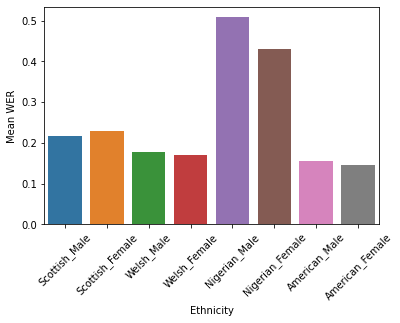

In [ ]:
#fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x="Ethnicity", y="Mean WER" ,data=Facebook_results_df)
plt.xticks(rotation=45)
plt.show()

Google resuts

In [ ]:
result_dict_Google = {}

result_dict_Google["Scottish_Male"] = UK_calculate_error(G_SM_predicted_dict, SM_ground_truth_dict)
result_dict_Google["Scottish_Female"] = UK_calculate_error(G_SF_predicted_dict, SF_ground_truth_dict)
result_dict_Google["Welsh_Male"] = UK_calculate_error(G_WM_predicted_dict, WM_ground_truth_dict)
result_dict_Google["Welsh_Female"] = UK_calculate_error(G_WF_predicted_dict, WF_ground_truth_dict)
result_dict_Google["Nigerian_Male"] = Nigerian_calculate_error(G_NM_predicted_dict, NM_ground_truth_dict)
result_dict_Google["Nigerian_Female"] = Nigerian_calculate_error(G_NF_predicted_dict, NF_ground_truth_dict)
result_dict_Google["American_Male"] = American_calculate_error(G_AM_predicted_dict, US_male_dict)
result_dict_Google["American_Female"] = American_calculate_error(G_AMF_predicted_dict, US_female_dict)

In [ ]:
result_dict_Google

{'American_Female': 0.14448085939049796,
 'American_Male': 0.15462777979068928,
 'Nigerian_Female': 0.3273862404969944,
 'Nigerian_Male': 0.35273186754712127,
 'Scottish_Female': 0.20853027132863503,
 'Scottish_Male': 0.1947603115825,
 'Welsh_Female': 0.20547036572222732,
 'Welsh_Male': 0.20444244086432378}

In [ ]:
Google_results_df = pd.DataFrame(result_dict_Google.items(), columns=['Ethnicity', 'Mean WER'])
Google_results_df

,Ethnicity,Mean WER
0,Scottish_Male,0.194760
1,Scottish_Female,0.208530
2,Welsh_Male,0.204442
3,Welsh_Female,0.205470
4,Nigerian_Male,0.352732
5,Nigerian_Female,0.327386
6,American_Male,0.154628
7,American_Female,0.144481


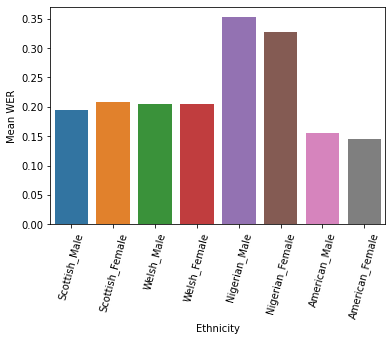

In [ ]:
ax = sns.barplot(x="Ethnicity", y="Mean WER" ,data=Google_results_df)
plt.xticks(rotation=75)
plt.show()

## Gender Bias

Facebook ASR 

In [ ]:
fb_gender_df = Facebook_results_df.copy()



In [ ]:
fb_gender_df

,Ethnicity,Mean WER
0,Scottish_Male,0.217822
1,Scottish_Female,0.230237
2,Welsh_Male,0.178368
3,Welsh_Female,0.169988
4,Nigerian_Male,0.508333
5,Nigerian_Female,0.430241
6,American_Male,0.154628
7,American_Female,0.145542


In [ ]:
import re

In [ ]:
Males = 0
Females = 0
for e,w in zip(fb_gender_df['Ethnicity'],fb_gender_df['Mean WER']):
    if re.search("Male",e):
        Males+=w
    else:
        Females+=w


In [ ]:
mean_male_WER = Males/3

In [ ]:
mean_female_WER = Females/3

In [ ]:
gender_google_dict = {"Males":mean_male_WER, "Females":mean_female_WER}

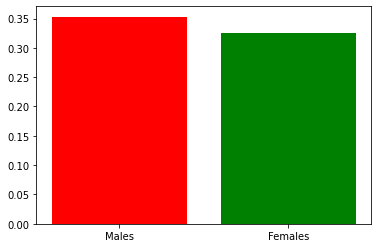

In [ ]:
names = list(gender_google_dict.keys())
values = list(gender_google_dict.values())

plt.bar(range(len(gender_google_dict)), values, tick_label=names, color=['red', 'green'])
plt.show()

Google ASR Gender Bias

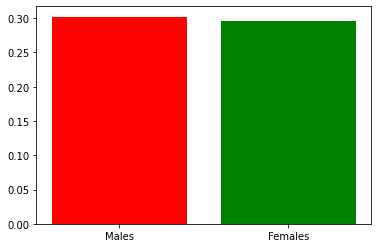

In [ ]:
fb_gender_df = Google_results_df.copy()

Males = 0
Females = 0
for e,w in zip(fb_gender_df['Ethnicity'],fb_gender_df['Mean WER']):
    if re.search("Male",e):
        Males+=w
    else:
        Females+=w


mean_male_WER = Males/3
mean_female_WER = Females/3

gender_fb_dict = {"Males":mean_male_WER, "Females":mean_female_WER}

names = list(gender_fb_dict.keys())
values = list(gender_fb_dict.values())

plt.bar(range(len(gender_fb_dict)), values, tick_label=names, color=['red', 'green'])
plt.show()

Adding American speech dataset to the pool

In [ ]:
import zipfile

In [ ]:
!tar -xvzf "/content/drive/MyDrive/colab/DSCI 531/ST-AEDS-20180100_1-OS.tgz" 

In [ ]:
location = "/content/"

In [ ]:
import os

In [ ]:
american_females =[]
american_males = []
for f in os.listdir(location):
    #print(f)
    if f.endswith('.wav'):
        if f.startswith('f'):
            american_females.append(f)
        elif f.startswith('m'):
            american_males.append(f)

In [ ]:
len(american_females)

2186

In [ ]:
len(american_males)

1656

In [ ]:
import pandas as pd

df = pd.read_csv("/content/text.txt", sep='\t', header = None)
df.head

In [ ]:
US_male_dict = {}
US_female_dict = {}

for i in range(len(df[0])):
    if df[0][i].startswith('f'):
        US_female_dict[df[0][i]] = df[1][i]

    elif df[0][i].startswith('m'):
        US_male_dict[df[0][i]] = df[1][i]
    #print(df[0][i])
    #break 

In [ ]:
US_male_dict

Facebook

In [ ]:
AMF_predicted = dict()
i = 0
for file in US_female_dict.keys():
    i+=1
    AMF_predicted[file[:-4]]= facebook_asr('/content/'+file)
    print(i)
    if i >500:
        break

In [ ]:
json12 = json.dumps(AMF_predicted)

# open file for writing, "w" 
f = open("/content/predicted/AmericanFemalePredictedFB.json","w")

# write json object to file
f.write(json12)

# close file
f.close()

In [ ]:
AM_predicted = dict()
i = 0
for file in US_male_dict.keys():
    i+=1
    AM_predicted[file[:-4]]= facebook_asr('/content/'+file)
    #print(i)
    if i >500:
        break

In [ ]:
json15 = json.dumps(AM_predicted)

# open file for writing, "w" 
f = open("/content/predicted/AmericanMalePredictedFB.json","w")

# write json object to file
f.write(json15)

# close file
f.close()

Google

In [ ]:
AM_predicted = dict()
i = 0
for file in US_male_dict.keys():
    i+=1
    AM_predicted[file[:-4]]= google_asr('/content/'+file)
    print(i)
    if i >500:
        break

In [ ]:
json13 = json.dumps(AM_predicted)

# open file for writing, "w" 
f = open("/content/predicted/AmericanMalePredictedGoo.json","w")

# write json object to file
f.write(json13)

# close file
f.close()

In [ ]:
AMF_predicted_goo = dict()
i = 0
for file in US_female_dict.keys():
    i+=1
    AMF_predicted_goo[file[:-4]]= google_asr('/content/'+file)
    print(i)
    if i >500:
        break

In [ ]:
json14 = json.dumps(AMF_predicted_goo)

# open file for writing, "w" 
f = open("/content/predicted/AmericanFemalePredictedGoo.json","w")

# write json object to file
f.write(json14)

# close file
f.close()

In [ ]:
error = []
for k1,v1 in US_female_dict.items():
    for k2,v2 in FB_AMF_predicted_dict.items():
        #print(type(v1))
        #print(type(v1))
        #break
        if k1 == k2+'.wav':
            print(v1)
            print(v2)
            #break
            if type(v2) == float or type(v1) == float:
                continue
            e = wer(v2.lower(), v1.lower())
            error.append(e)

mean = np.mean(error)
mean

In [ ]:
G_AM_predicted_dict

In [ ]:
US_female_dict

In [ ]:
m0001_us_m0001_00001